**Linear Regression Portfolio Project**

In this project I'm gonna work with "Medical Cost" dataset and implement my knowledge on the this dataset. First I'm gonna analyze the data and then use a linear regression model on my data to make predictions based on the features.

Import libraries 

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics

Get the data

In [54]:
cost_df = pd.read_csv('insurance.csv')
cost_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


We have 7 features that:
age
sex
bmi
children
smoker
region
charges

With the first 6 features we're gonna try to predict the last features : charges


In [55]:
# Before we start I want to get more information about my dataset. 
cost_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [56]:
# let's check that if there is any null row in our dataset
cost_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

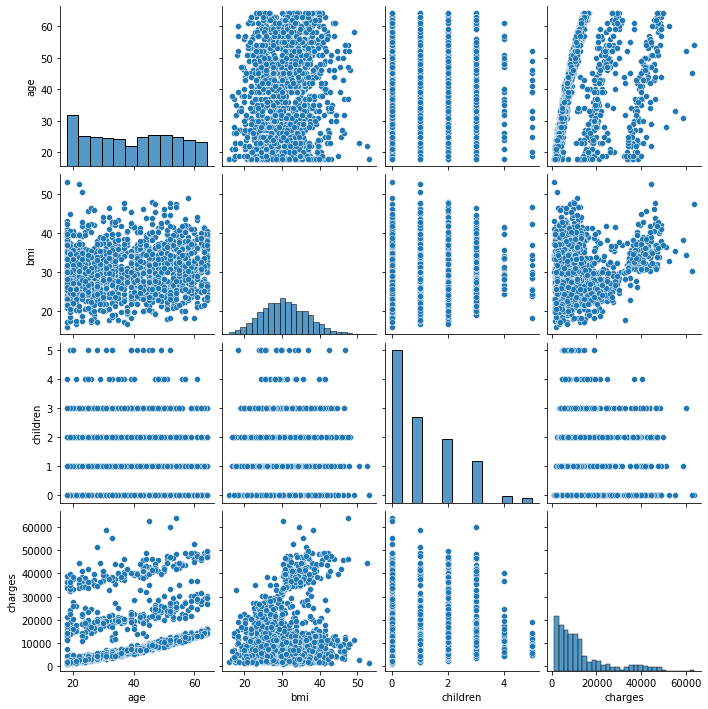

In [57]:
# we don't have any null value so we can move on and visualize the data
sns.pairplot(cost_df)

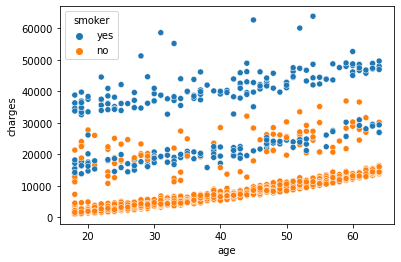

In [58]:
# the chart above is so complicated so I want to visualize some features by one by.
sns.scatterplot(x='age', y='charges', data=cost_df, hue='smoker')
# as we can see there is a linear increases(younger pays less) also if you're a smoker you have to pay more charge then a non-smoker

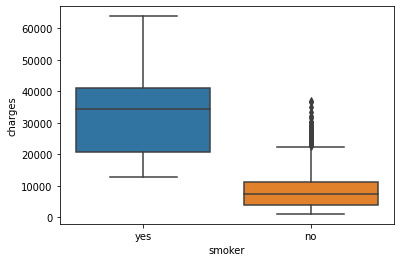

In [59]:
sns.boxplot(x='smoker', y='charges', data=cost_df)
# now we can see clearly that smkoing effects the charges

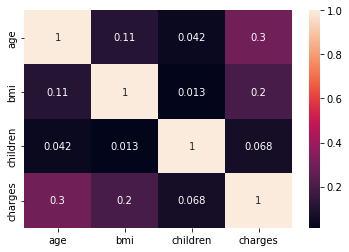

In [60]:
sns.heatmap(cost_df.corr(), annot=True)
# with heatmap we can understand the correlation of features with one another

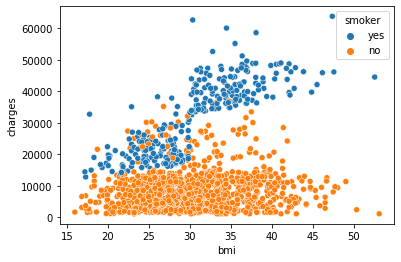

In [61]:
sns.scatterplot(x='bmi', y='charges', data=cost_df, hue='smoker')
# for smoker person there is a linear line that shows us when the bmi increases, the charge also increases

Now we know that there is a strong correlation between smoker feature and charges but there are some noteworthy correlation such as age-charges and bmi-charges.

In [62]:
# smoker feature is useful but we have to convert it to numeric value to use when training phase
cost_df['smoker'] = np.where(cost_df['smoker']=='yes', 1, 0)
cost_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830
1334,18,female,31.920,0,0,northeast,2205.98080
1335,18,female,36.850,0,0,southeast,1629.83350
1336,21,female,25.800,0,0,southwest,2007.94500


In [63]:
# let's begin to train our model

X = cost_df.drop(['charges', 'region', 'sex'], axis=1)
y = cost_df['charges']

linreg = LinearRegression()

In [64]:
# now split our train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
linreg.fit(X_train, y_train)

LinearRegression()

In [66]:
linreg.coef_
# to see the coefficient 

array([  262.31060687,   331.74780875,   379.02452728, 23699.63589053])

In [70]:
coef_df = pd.DataFrame(linreg.coef_, X.columns, columns=['coef'])
coef_df
# it's better to understand the coeffient in a dataframe

,coef
age,262.310607
bmi,331.747809
children,379.024527
smoker,23699.635891


In [71]:
# now let's switch to the prediction phase
preds = linreg.predict(X_test)
preds
# it's very long and meaningless so I want to visualize it below

array([ 8.48006203e+03,  6.96853565e+03,  3.69728391e+04,  9.31049341e+03,
        2.68392121e+04,  1.10958507e+04,  1.94880246e+01,  1.69290641e+04,
        6.46901186e+02,  1.10744225e+04,  2.83669588e+04,  9.22723399e+03,
        5.36873437e+03,  3.85188017e+04,  4.05796772e+04,  3.72708277e+04,
        1.53365498e+04,  3.61254658e+04,  9.31712306e+03,  3.14643164e+04,
        3.94794502e+03,  1.04186683e+04,  2.63531950e+03,  6.54233946e+03,
        1.11476369e+04,  1.25725757e+04,  1.49492691e+04,  5.87087793e+03,
        9.47742387e+03,  2.28675446e+03,  9.29501776e+03,  1.30758632e+04,
        4.64285342e+03,  3.19104515e+03,  4.71781915e+03,  1.25754834e+04,
        2.21197400e+03,  9.14392468e+03,  3.32901712e+04,  3.27656497e+04,
        3.93329608e+03,  4.11643626e+03,  1.45112746e+04,  1.14889096e+04,
        8.84056782e+03,  1.25446997e+04,  4.98953519e+03,  3.32259509e+03,
        3.56153188e+04,  9.19176083e+03,  1.61342983e+04,  2.41033317e+03,
        1.21787276e+04,  

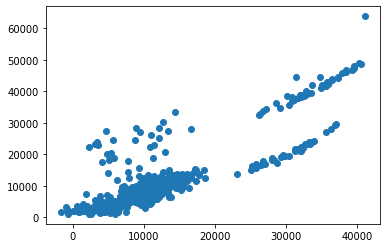

In [73]:
plt.scatter(x=preds, y=y_test)
# the line is interruptedly so we didn't get a sucessful result but to understand it more clear I'm gonna check the error rate

In [76]:
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, preds))

Mean Absolute Error: 4210.867850540484


In [77]:
print("Mean squared err: ", metrics.mean_squared_error(y_test, preds))
print("Root mean squared err: ", np.sqrt(metrics.mean_squared_error(y_test, preds)))

Mean squared err:  35299792.100293264
Root mean squared err:  5941.362815069727


As we can see, we have high error rates so our model is not successful at all. We have to lower it. We have to make changes on the data to develop to the model.